In [14]:
import cartopy
import cartopy.crs as ccrs
import xarray as xr
from pathlib import Path 
notebook_dir = Path.cwd()


In [4]:
from osgeo import gdal, osr

gdal.UseExceptions()


fname = 'norfolk.tif'

ds = gdal.Open(fname)
data = ds.ReadAsArray()
gt = ds.GetGeoTransform()
proj = ds.GetProjection()

inproj = osr.SpatialReference()
inproj.ImportFromWkt(proj)

print(inproj)

GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9122"]],
    AXIS["Latitude",NORTH],
    AXIS["Longitude",EAST],
    AUTHORITY["EPSG","4326"]]


In [6]:
projcs = inproj.GetAuthorityCode('PROJCS')
#projection = ccrs.epsg(projcs)
#print(projection)

In [10]:
projection=ccrs.PlateCarree()

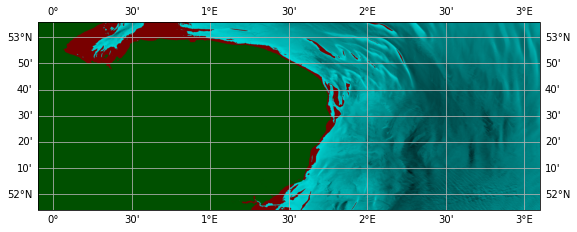

In [12]:
import matplotlib.pyplot as plt

subplot_kw = dict(projection=projection)
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=subplot_kw)

extent = (gt[0], gt[0] + ds.RasterXSize * gt[1],
          gt[3] + ds.RasterYSize * gt[5], gt[3])

img = ax.imshow(data[:3, :, :].transpose((1, 2, 0)), extent=extent,
                origin='upper')
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)


In [15]:
# Import the sample bathymetry data
bathy_ds = xr.open_dataset(notebook_dir / 'norfolk_bathy.nc')
bathy_lon, bathy_lat, bathy_h = bathy_ds.bathymetry.longitude, bathy_ds.bathymetry.latitude, bathy_ds.bathymetry.values

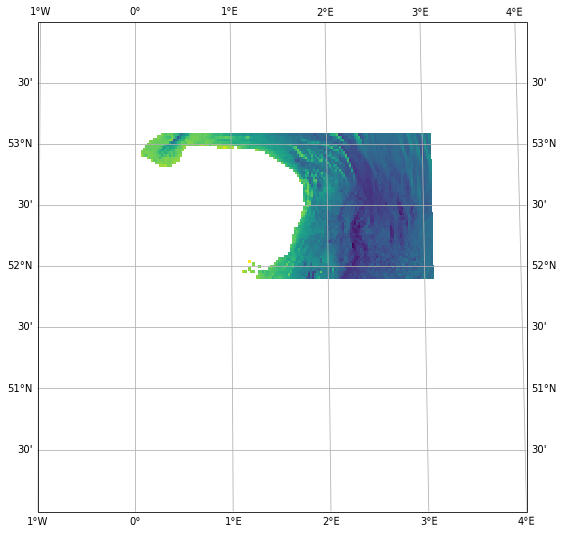

In [22]:
ss = 20
subplot_kw = dict(projection=ccrs.Robinson())
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=subplot_kw)
ax.pcolor(bathy_lon[::ss], bathy_lat[::ss], bathy_h[::ss, ::ss], transform=ccrs.PlateCarree() )
ax.set_extent((-1,4,50,54))
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
